In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
#Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
import re
%matplotlib inline

In [2]:
directory = os.fsencode('../data/')
location = []  #range location
mean_dopp = []  #mean of doppler spectrum
var_dopp = []  #variance of doppler spectrum (wrt mean), normalized by total power and square of number of bins
SPC_Hi = []  #scattering point cloud, high threshold
SPD = [] #scattering point difference, high threshold
MDR = [] #magnitude difference rate
strength = [] #sum of doppler spectrum
max_dev = [] #variance of doppler spectrum (wrt peak of dop)
SPC_Lo = [] #scattering point cloud, low threshold
peak_count = [] #peak count
std_deviation = [] #var_dopp difference rate
harmonic_power_content = [] #power content of minor peaks in doppler spectrum
frame_counter = [] #frame reference of each sample, just for visualization, not a feature
correlation = []
max_to_mean_dist = []
peak_strength_std = []
Lo_peak_count = []
Lo_harmonic_power_content = []
SPC_Mi = []
Lo_skewness = []
Lo_skewness_variation = []
Hi_deviation = []
Hi_deviation_difference = []
Mi_peak_count = []
Mi_harmonic_power_content = []
Mi_skewness = []
Mi_skewness_difference = []
Hi_skewness = []
Hi_skewness_difference = []
Lo_skewness_mean = []
Side_lobe_strength = []
Side_lobe_max_strength = []
SPC_Lo_skewness = []
SPC_Mi_Hi_skewness = []
SPC_Mi_variance = []

number_files = 0
class_instances = 0
number_of_classes = 3 #car cyclist pedestrian
folders = []
folders.append('Dataset_1')
folders.append('Dataset_2')
entire_dataset = []
individual_dataset_length = [0]
files = []
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    # and (filename.find('walking_boresight_test_2') != -1 or filename.find('driving_boresight_test_2') != -1)
    if not(filename.find('walking_diagonal_1') != -1) and filename.find('boresight') != -1 and filename.find('Dataset')!=-1:
        file_string = ""
        files.append(file_string.join(re.split('[.]',filename)[0]))
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        if(len(entire_dataset) == 0):
            entire_dataset = data.values
        else:
            entire_dataset = np.append(entire_dataset,data.values,axis=0)     
        individual_dataset_length.append(data.values.shape[0])
        if(filename.find('driving')!=-1):
            class_instances += 1
        number_files += 1

### Normalize dataset
#scaler = preprocessing.StandardScaler().fit(entire_dataset)
scaler = preprocessing.MinMaxScaler().fit(entire_dataset)
scaled_dataset = scaler.transform(entire_dataset)

for idx in range(len(individual_dataset_length)-1):
    
    lower_limit = sum(individual_dataset_length[:idx+1])
    upper_limit = sum(individual_dataset_length[:idx+2])
    location.append(scaled_dataset[lower_limit:upper_limit,0])
    mean_dopp.append(scaled_dataset[lower_limit:upper_limit,1])
    var_dopp.append(scaled_dataset[lower_limit:upper_limit,2])
    SPC_Hi.append(scaled_dataset[lower_limit:upper_limit,3])
    SPD.append(scaled_dataset[lower_limit:upper_limit,4])
    MDR.append(scaled_dataset[lower_limit:upper_limit,5])
    strength.append(scaled_dataset[lower_limit:upper_limit,6])
    max_dev.append(scaled_dataset[lower_limit:upper_limit,7])
    SPC_Lo.append(scaled_dataset[lower_limit:upper_limit,8])
    peak_count.append(scaled_dataset[lower_limit:upper_limit,9])
    std_deviation.append(scaled_dataset[lower_limit:upper_limit,10])
    harmonic_power_content.append(scaled_dataset[lower_limit:upper_limit,11])
    frame_counter.append(entire_dataset[lower_limit:upper_limit,12])
    correlation.append(scaled_dataset[lower_limit:upper_limit,13])
    max_to_mean_dist.append(scaled_dataset[lower_limit:upper_limit,14])
    peak_strength_std.append(scaled_dataset[lower_limit:upper_limit,15])
    Lo_peak_count.append(scaled_dataset[lower_limit:upper_limit,16])
    Lo_harmonic_power_content.append(scaled_dataset[lower_limit:upper_limit,17])
    SPC_Mi.append(scaled_dataset[lower_limit:upper_limit,18])
    Lo_skewness.append(scaled_dataset[lower_limit:upper_limit,19])
    Lo_skewness_variation.append(scaled_dataset[lower_limit:upper_limit,20])
    Hi_deviation.append(scaled_dataset[lower_limit:upper_limit,21])
    Hi_deviation_difference.append(scaled_dataset[lower_limit:upper_limit,22])
    Mi_peak_count.append(scaled_dataset[lower_limit:upper_limit,23])
    Mi_harmonic_power_content.append(scaled_dataset[lower_limit:upper_limit,24])
    Mi_skewness.append(scaled_dataset[lower_limit:upper_limit,25])
    Mi_skewness_difference.append(scaled_dataset[lower_limit:upper_limit,26])
    Hi_skewness.append(scaled_dataset[lower_limit:upper_limit,27])
    Hi_skewness_difference.append(scaled_dataset[lower_limit:upper_limit,28])
    Lo_skewness_mean.append(scaled_dataset[lower_limit:upper_limit,29])
    Side_lobe_strength.append(scaled_dataset[lower_limit:upper_limit,30])
    Side_lobe_max_strength.append(scaled_dataset[lower_limit:upper_limit,31])
    SPC_Lo_skewness.append(scaled_dataset[lower_limit:upper_limit,32])
    SPC_Mi_Hi_skewness.append(scaled_dataset[lower_limit:upper_limit,33])
    SPC_Mi_variance.append(scaled_dataset[lower_limit:upper_limit,34])
   
colors_9_datasets = ['forestgreen','limegreen','lime','violet','magenta','darkviolet','gold','orange','navajowhite']
colors_6_datasets = ['forestgreen','limegreen','violet','magenta','gold','orange']
colors_3_datasets = ['red','green','blue']
colors = []
if number_files == 9:
    colors = colors_9_datasets
elif number_files == 6:
    colors = colors_6_datasets
elif number_files == 7:
    colors = ['forestgreen','limegreen','lime','violet','magenta','darkviolet','purple']
else:
    colors = colors_3_datasets

colormaps = ['Greens','Purples','Reds','Greens','Blues','Greys']
markers = ['v','v']


../data/biking_boresight_1_Dataset_1_statistics.txt
../data/biking_boresight_1_Dataset_2_statistics.txt
../data/biking_boresight_2_Dataset_1_statistics.txt
../data/biking_boresight_2_Dataset_2_statistics.txt
../data/biking_boresight_3_Dataset_1_statistics.txt
../data/biking_boresight_3_Dataset_2_statistics.txt
../data/driving_boresight_1_Dataset_1_statistics.txt
../data/driving_boresight_1_Dataset_2_statistics.txt
../data/driving_boresight_2_Dataset_1_statistics.txt
../data/driving_boresight_2_Dataset_2_statistics.txt
../data/driving_boresight_3_Dataset_1_statistics.txt
../data/driving_boresight_3_Dataset_2_statistics.txt
../data/walking_boresight_1_Dataset_1_statistics.txt
../data/walking_boresight_1_Dataset_2_statistics.txt
../data/walking_boresight_2_Dataset_1_statistics.txt
../data/walking_boresight_2_Dataset_2_statistics.txt
../data/walking_boresight_3_Dataset_1_statistics.txt
../data/walking_boresight_3_Dataset_2_statistics.txt


In [3]:
print(files)

['biking_boresight_1_Dataset_1_statistics', 'biking_boresight_1_Dataset_2_statistics', 'biking_boresight_2_Dataset_1_statistics', 'biking_boresight_2_Dataset_2_statistics', 'biking_boresight_3_Dataset_1_statistics', 'biking_boresight_3_Dataset_2_statistics', 'driving_boresight_1_Dataset_1_statistics', 'driving_boresight_1_Dataset_2_statistics', 'driving_boresight_2_Dataset_1_statistics', 'driving_boresight_2_Dataset_2_statistics', 'driving_boresight_3_Dataset_1_statistics', 'driving_boresight_3_Dataset_2_statistics', 'walking_boresight_1_Dataset_1_statistics', 'walking_boresight_1_Dataset_2_statistics', 'walking_boresight_2_Dataset_1_statistics', 'walking_boresight_2_Dataset_2_statistics', 'walking_boresight_3_Dataset_1_statistics', 'walking_boresight_3_Dataset_2_statistics']


In [4]:
def my_plot(feature1,feature2,linestyle="None",xlabel='',ylabel=''):
    fig,ax = plt.subplots(1,1,figsize=[10,10])
    for idx in range(len(files)):
        split_filename = re.split("[_]",files[idx])
        if split_filename[0] == 'biking':
            cmap = colors_3_datasets[0]
        elif split_filename[0] == 'walking':
            cmap = colors_3_datasets[1]
        elif split_filename[0] == 'driving':
            cmap = colors_3_datasets[2]
            
        if split_filename[4] == '1':
            marker = markers[0]
        else:
            marker = markers[1]
        ax.plot(feature1[idx],feature2[idx],color=cmap,marker=marker,linestyle=linestyle)
        #color=mpl.cm.get_cmap(cmap)((int(split_filename[2])+1)/(class_instances/len(folders)+2))
    params = {'mathtext.default': 'regular' }          
    plt.rcParams.update(params)
    ax.set_xlabel(xlabel,fontsize=30)
    ax.set_ylabel(ylabel,fontsize=30)
    #ax.legend(files,bbox_to_anchor=[1.5,1])
    ax.grid(True)
    

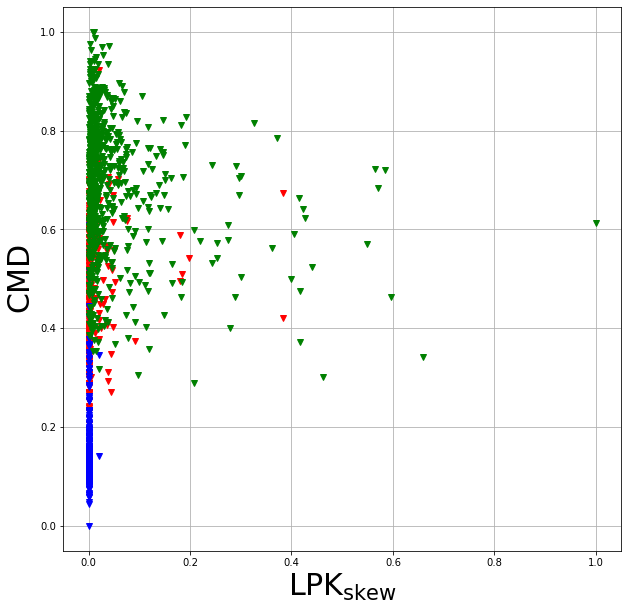

In [5]:
name_1 = '$LPK_{skew}$'
name_2 = '$CMD$'
my_plot(Hi_skewness_difference,Side_lobe_strength,'None',name_1,name_2)
#plt.savefig('Thesis_figures/Features_'+name_1+'_'+name_2+'.png',format='png')

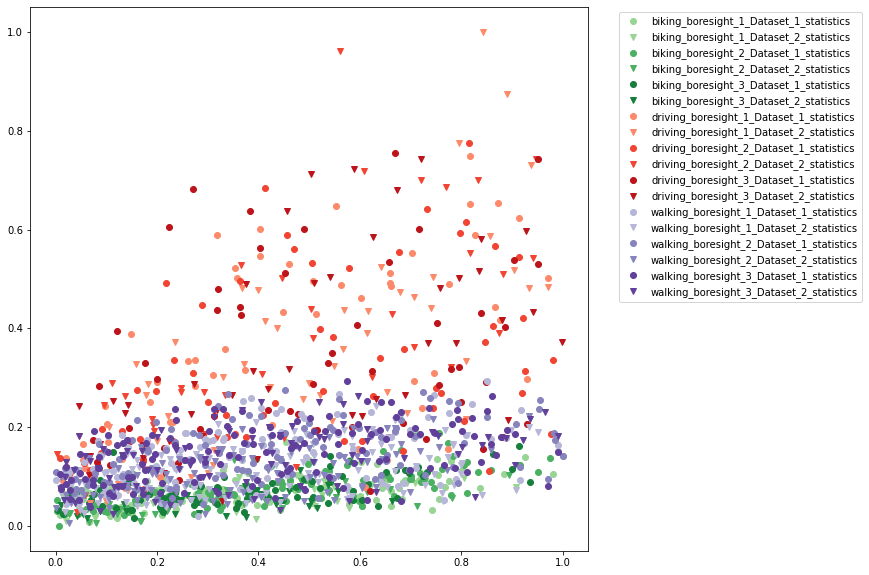

In [25]:
my_plot(location,strength)

In [6]:
%matplotlib widget
my_plot(Side_lobe_strength,location)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
my_plot(SPC_Mi_variance,Hi_skewness_difference)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
my_plot(mean_dopp,SPC_Lo_skewness)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
my_plot(Hi_skewness_difference,Hi_deviation)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
my_plot(Hi_skewness_difference,SPC_Lo)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
my_plot(SPC_Hi,SPD)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
my_plot(Lo_skewness,location)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
my_plot(SPC_Hi,SPC_Lo)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
my_plot(SPC_Lo,max_to_mean_dist)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
my_plot(SPC_Hi,SPC_Mi)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [17]:
%matplotlib widget
my_plot(SPC_Mi_variance,Side_lobe_strength)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
fig= plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
for idx in range(len(files)):
    split_filename = re.split("[_]",files[idx])
    if split_filename[0] == 'biking':
        cmap = colormaps[0]
    elif split_filename[0] == 'walking':
        cmap = colormaps[1]
    elif split_filename[0] == 'driving':
        cmap = colormaps[2]

    if split_filename[4] == '1':
        marker = markers[0]
    else:
        marker = markers[1]
    ax.scatter(Side_lobe_max_strength[idx],Side_lobe_strength[idx],strength[idx],color=mpl.cm.get_cmap(cmap)((int(3)+1)/(class_instances/len(folders)+2)),marker=marker)
ax.legend(files,bbox_to_anchor=[1.2,1])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:

my_plot(frame_counter,max_dev,'--')


In [ ]:

my_plot(frame_counter,Lo_skewness,'--')




In [ ]:
my_plot(frame_counter,Lo_skewness_mean,'--')


In [ ]:
my_plot(frame_counter,Hi_skewness,'--')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=[12,5])
ax.plot(Hi_skewness[0],Mi_skewness[0],'o')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=[20,5])
for i in range(len(location)):
    ax.plot(frame_counter[i],peak_count[i],'o',color=colors[i])
_ = ax.set_xticks(np.arange(0,301,5))
_ = fig.legend(files,bbox_to_anchor=[1.3,1])

In [ ]:
print(peak_count[2][40:50])
print(frame_counter[2][40:50])

In [ ]:
fig,ax = plt.subplots(1,1,figsize=[20,5])
for i in range(len(location)):
    ax.plot(frame_counter[i],location[i],'o',color=colors[i])
_ = ax.set_xticks(np.arange(0,301,5))
_ = fig.legend(files,bbox_to_anchor=[1.3,1])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(location)):
    ax.plot(SPC_Mi[i],SPC_Lo[i], SPC_Hi[i],'o',color=colors[i])
_ = fig.legend(files,bbox_to_anchor=[1.3,1])

In [ ]:
fig,ax = plt.subplots(1,1,figsize=[20,5])
for i in range(len(location)):
    ax.plot(frame_counter[i],max_to_mean_dist[i],'o',color=colors[i])
_ = ax.set_xticks(np.arange(0,301,5))
_ = fig.legend(files,bbox_to_anchor=[1.3,1])

In [ ]:
fig,ax = plt.subplots(1,1,figsize=[20,5])
for i in range(len(location)):
    ax.plot(frame_counter[i],peak_strength_std[i],'o',color=colors[i])
_ = ax.set_xticks(np.arange(0,301,5))
_ = fig.legend(files,bbox_to_anchor=[1.3,1])

In [ ]:
fig,ax = plt.subplots(1,1,figsize=[12,5])
for i in range(len(location)):
    ax.plot(frame_counter[i],Hi_deviation[i],'o',color=colors[i])
ax.legend(files,bbox_to_anchor=[1.3,1])


In [ ]:
%matplotlib inline